In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRFRegressor
import warnings

In [3]:
df = pd.read_csv("data/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=["math score"], axis=1)

In [6]:
y = df["math score"]

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preproccessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [8]:
X = preproccessor.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [10]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_sqaure = r2_score(true, predicted)
    return mae, rmse, r2_sqaure

In [16]:
models = {
    "Linear Regression" : LinearRegression(),
     "Lasso" : Lasso(),
     "Ridge" : Ridge(),
     "KNeighborsRegressor" : KNeighborsRegressor(),
     "DecisionTreeRegressor" : DecisionTreeRegressor(),
     "XGBRFRegressor" : XGBRFRegressor(),
     "CatBoostRegressor" : CatBoostRegressor(),
     "AdaBoostRegressor" : AdaBoostRegressor() 
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    
    print("model performance, Training set")
    print(f"R mean square error: {model_train_rmse}")
    print("Mean absoulute error: {:4f}".format(model_train_mae))
    print("- R2 score: {:.4f}".format(model_train_r2))
    r2_list.append(model_test_r2)
    
    print("--------------------------------------")
    
    print("model performance, Testing set")
    print(f"R mean square error: {model_test_rmse}")
    print("Mean absoulute error: {:4f}".format(model_test_mae))
    print("- R2 score: {:.4f}".format(model_test_r2))
    
    print("========================================")

Linear Regression
model performance, Training set
R mean square error: 5.324354270503339
Mean absoulute error: 4.267139
- R2 score: 0.8743
--------------------------------------
model performance, Testing set
R mean square error: 5.3959872842671395
Mean absoulute error: 4.215820
- R2 score: 0.8803
Lasso
model performance, Training set
R mean square error: 6.593815587795566
Mean absoulute error: 5.206303
- R2 score: 0.8071
--------------------------------------
model performance, Testing set
R mean square error: 6.519694535667419
Mean absoulute error: 5.157882
- R2 score: 0.8253
Ridge
model performance, Training set
R mean square error: 5.323324922741654
Mean absoulute error: 4.264988
- R2 score: 0.8743
--------------------------------------
model performance, Testing set
R mean square error: 5.390387016935639
Mean absoulute error: 4.211101
- R2 score: 0.8806
KNeighborsRegressor
model performance, Training set
R mean square error: 5.707683417990174
Mean absoulute error: 4.516750
- R2 sc

In [18]:
model_list, r2_list

(['Linear Regression',
  'Lasso',
  'Ridge',
  'KNeighborsRegressor',
  'DecisionTreeRegressor',
  'XGBRFRegressor',
  'CatBoostRegressor',
  'AdaBoostRegressor'],
 [0.8803449074540941,
  0.8253197323627853,
  0.8805931485028737,
  0.7838129945787431,
  0.7417177066998057,
  0.8624320896911152,
  0.8516318920747058,
  0.8498551185970613])

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880345
5,XGBRFRegressor,0.862432
6,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.849855
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.741718


In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy = {score}")

Accuracy = 88.03449074540941


Text(0, 0.5, 'Predicted')

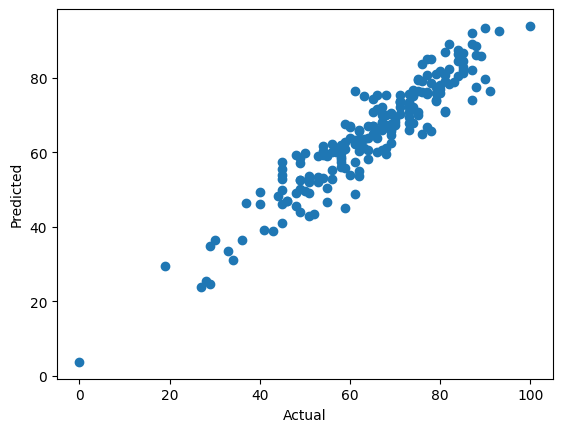

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

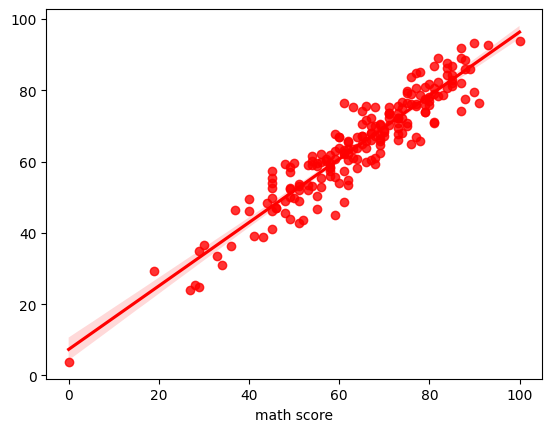

In [22]:
sns.regplot(x=y_test, y=y_pred, color="red")

In [23]:
pred_df = pd.DataFrame({"Actual": y_test, "Predict": y_pred, "Difference": y_test-y_pred})
pred_df

,Actual,Predict,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
